**Packeges Imports**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


**Load CSV DATA**

In [2]:
dataFrame = pd.read_csv('taxi_trip_pricing.csv')

**Load Columns**

In [3]:
for column in dataFrame.columns:
  print(column)

Trip_Distance_km
Time_of_Day
Day_of_Week
Passenger_Count
Traffic_Conditions
Weather
Base_Fare
Per_Km_Rate
Per_Minute_Rate
Trip_Duration_Minutes
Trip_Price


**Droping unnecessary Columns**

In [4]:
dataFrame.drop(['Base_Fare','Per_Km_Rate','Per_Minute_Rate'] , axis = 1 , inplace = True)

In [5]:
for column in dataFrame.columns:
  print(column)

Trip_Distance_km
Time_of_Day
Day_of_Week
Passenger_Count
Traffic_Conditions
Weather
Trip_Duration_Minutes
Trip_Price


In [6]:
dataFrame.head(10)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,22.64,15.6180
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,89.33,60.2028
6,3.85,Afternoon,Weekday,4.0,High,Rain,5.05,11.2645
7,43.44,Evening,Weekend,3.0,NaN,Clear,NaN,101.1216
8,30.45,Morning,Weekday,3.0,High,Clear,110.33,NaN
9,35.70,Afternoon,Weekday,2.0,Low,Rain,NaN,75.5657


**Encodin Ordinal Data**

In [7]:
Traffic_Conditions_mapper = {"Low": 0 , "Medium" : 1 , "High" : 2}
dataFrame['Traffic_Conditions'] = dataFrame['Traffic_Conditions'].replace(Traffic_Conditions_mapper)


Time_of_Day_mapper = {"Morning": 0 , "Afternoon" : 1 , "Evening" : 2 , "Night" : 3} 
dataFrame['Time_of_Day'] = dataFrame['Time_of_Day'].replace(Time_of_Day_mapper)

Day_of_Week_mapper = {"Weekday": 0 , "Weekend" : 1} 
dataFrame['Day_of_Week'] = dataFrame['Day_of_Week'].replace(Day_of_Week_mapper) 

Weather_mapper = {"Clear": 0 , "Rain" : 1 , "Snow" : 2} 
dataFrame['Weather'] = dataFrame['Weather'].replace(Weather_mapper) 
dataFrame.head(10)





C:\Users\mahdi\AppData\Local\Temp\ipykernel_17640\989743489.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame['Traffic_Conditions'] = dataFrame['Traffic_Conditions'].replace(Traffic_Conditions_mapper)
C:\Users\mahdi\AppData\Local\Temp\ipykernel_17640\989743489.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame['Time_of_Day'] = dataFrame['Time_of_Day'].replace(Time_of_Day_mapper)
C:\Users\mahdi\AppData\Local\Temp\ipykernel_17640\989743489.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated an

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Trip_Duration_Minutes,Trip_Price
0,19.35,0.0,0.0,3.0,0.0,0.0,53.82,36.2624
1,47.59,1.0,0.0,1.0,2.0,0.0,40.57,NaN
2,36.87,2.0,1.0,1.0,2.0,0.0,37.27,52.9032
3,30.33,2.0,0.0,4.0,0.0,NaN,116.81,36.4698
4,NaN,2.0,0.0,3.0,2.0,0.0,22.64,15.6180
5,8.64,1.0,1.0,2.0,1.0,0.0,89.33,60.2028
6,3.85,1.0,0.0,4.0,2.0,1.0,5.05,11.2645
7,43.44,2.0,1.0,3.0,NaN,0.0,NaN,101.1216
8,30.45,0.0,0.0,3.0,2.0,0.0,110.33,NaN
9,35.70,1.0,0.0,2.0,0.0,1.0,NaN,75.5657


**Num of Null Values**

In [8]:
dataFrame.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

**Filling Null Data**

In [9]:
dataFrame['Trip_Distance_km'] = dataFrame['Trip_Distance_km'].fillna(dataFrame['Trip_Distance_km'].mean())
dataFrame['Trip_Duration_Minutes'] = dataFrame['Trip_Duration_Minutes'].fillna(dataFrame['Trip_Duration_Minutes'].mean())
dataFrame['Trip_Price'] = dataFrame['Trip_Price'].fillna(dataFrame['Trip_Price'].mean())
dataFrame['Traffic_Conditions'] = dataFrame['Traffic_Conditions'].apply(
    lambda x: np.random.choice([0, 1, 2]) if np.isnan(x) else x
)
dataFrame['Passenger_Count'] = dataFrame['Passenger_Count'].apply(
    lambda x: np.random.choice([1, 2, 3, 4]) if np.isnan(x) else x
)

dataFrame['Time_of_Day'] = dataFrame['Time_of_Day'].apply(
    lambda x: np.random.choice([0, 1, 2, 3]) if np.isnan(x) else x
)
dataFrame['Day_of_Week'] = dataFrame['Day_of_Week'].apply(
    lambda x: np.random.choice([0, 1]) if np.isnan(x) else x
)
dataFrame['Weather'] = dataFrame['Weather'].apply(
    lambda x: np.random.choice([0, 1, 2]) if np.isnan(x) else x
)



In [10]:
dataFrame.isnull().sum() 

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

In [11]:
dataFrame.head(20)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Trip_Duration_Minutes,Trip_Price
0,19.350000,0.0,0.0,3.0,0.0,0.0,53.820000,36.262400
1,47.590000,1.0,0.0,1.0,2.0,0.0,40.570000,56.874773
2,36.870000,2.0,1.0,1.0,2.0,0.0,37.270000,52.903200
3,30.330000,2.0,0.0,4.0,0.0,2.0,116.810000,36.469800
4,27.070547,2.0,0.0,3.0,2.0,0.0,22.640000,15.618000
5,8.640000,1.0,1.0,2.0,1.0,0.0,89.330000,60.202800
6,3.850000,1.0,0.0,4.0,2.0,1.0,5.050000,11.264500
7,43.440000,2.0,1.0,3.0,1.0,0.0,62.118116,101.121600
8,30.450000,0.0,0.0,3.0,2.0,0.0,110.330000,56.874773
9,35.700000,1.0,0.0,2.0,0.0,1.0,62.118116,75.565700


**Ploting The Columns Data**

<Axes: >

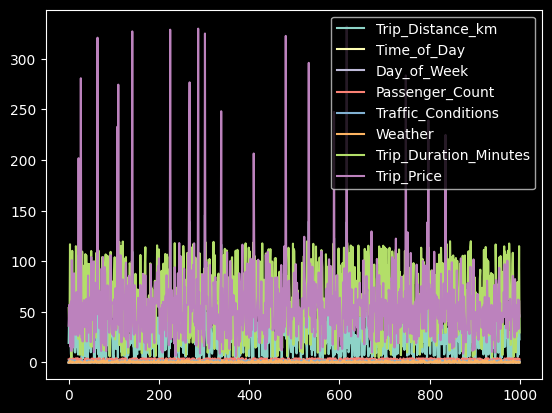

In [12]:
dataFrame.plot()

**Correlation**

In [13]:
corr_matrix = dataFrame.corr()      
corr_matrix["Trip_Price"].sort_values(ascending=False)

Trip_Price               1.000000
Trip_Distance_km         0.829685
Trip_Duration_Minutes    0.215144
Traffic_Conditions       0.058734
Weather                  0.020149
Time_of_Day              0.015643
Passenger_Count         -0.003376
Day_of_Week             -0.033539
Name: Trip_Price, dtype: float64

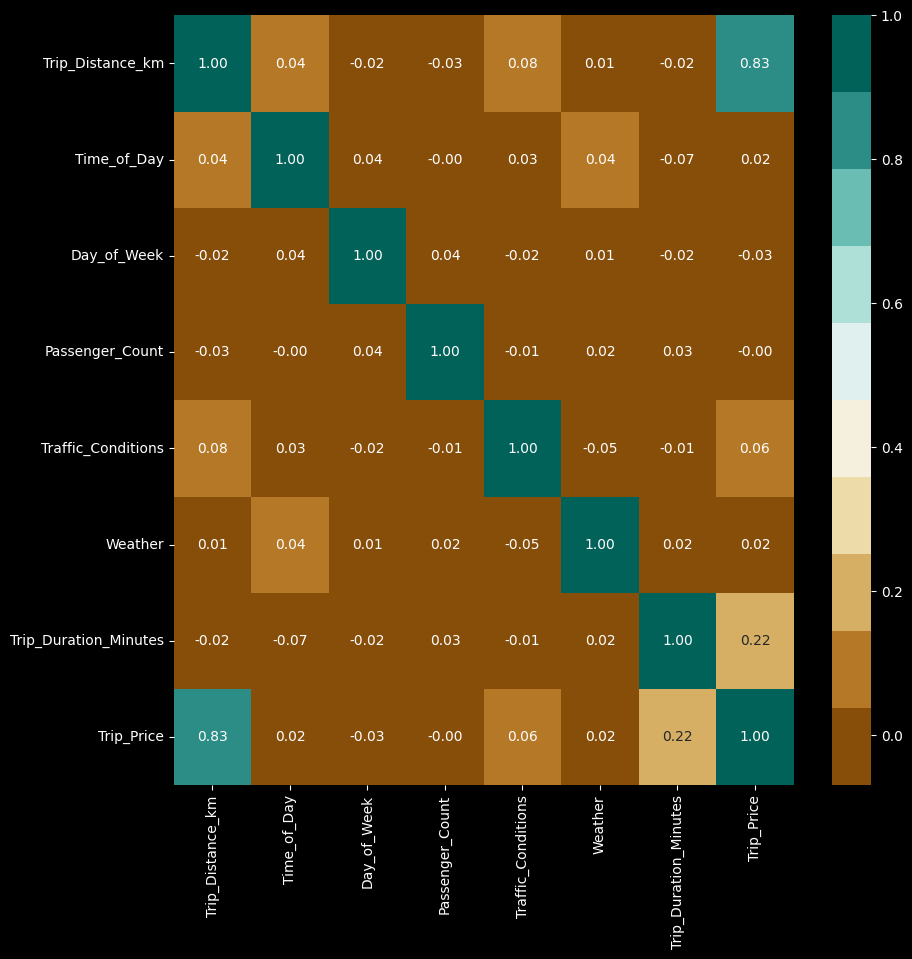

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.color_palette("BrBG", 10)
sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt=".2f")
plt.show()

**Value Counting**

In [15]:
dataFrame['Traffic_Conditions'].value_counts()


Traffic_Conditions
0.0    415
1.0    389
2.0    196
Name: count, dtype: int64

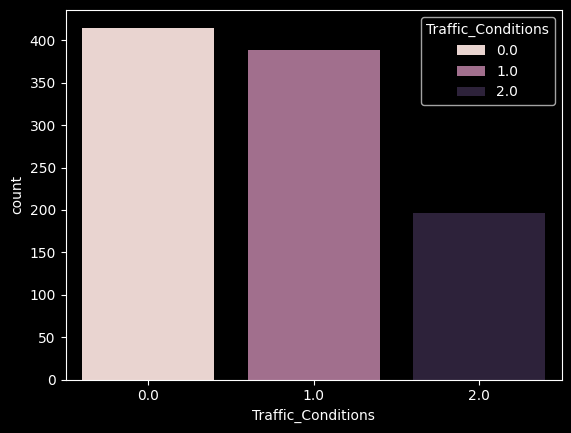

In [16]:
sns.countplot(x= 'Traffic_Conditions',hue='Traffic_Conditions', data=dataFrame, )
plt.show()

In [17]:
dataFrame['Passenger_Count'].value_counts()

Passenger_Count
3.0    261
2.0    255
1.0    253
4.0    231
Name: count, dtype: int64

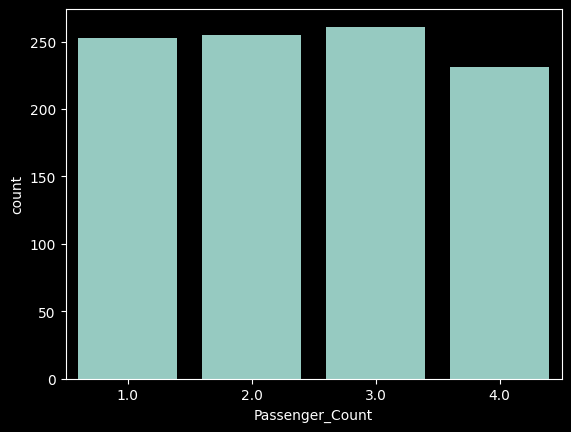

In [18]:
sns.countplot(x= 'Passenger_Count', data=dataFrame, )
plt.show()

In [19]:
dataFrame['Time_of_Day'].value_counts()

Time_of_Day
1.0    380
0.0    297
2.0    220
3.0    103
Name: count, dtype: int64

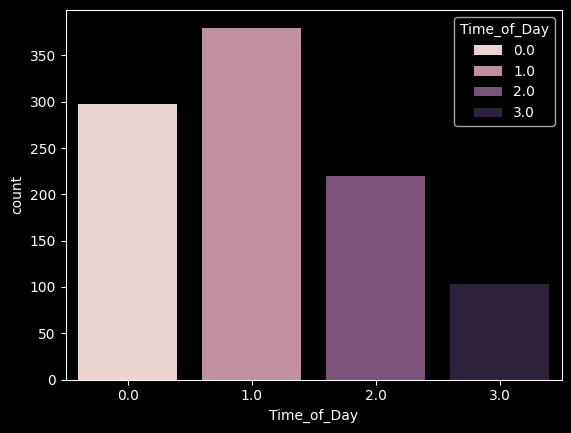

In [20]:
sns.countplot(x= 'Time_of_Day',hue='Time_of_Day', data=dataFrame,)
plt.show()

In [21]:
dataFrame['Weather'].value_counts()

Weather
0.0    680
1.0    250
2.0     70
Name: count, dtype: int64

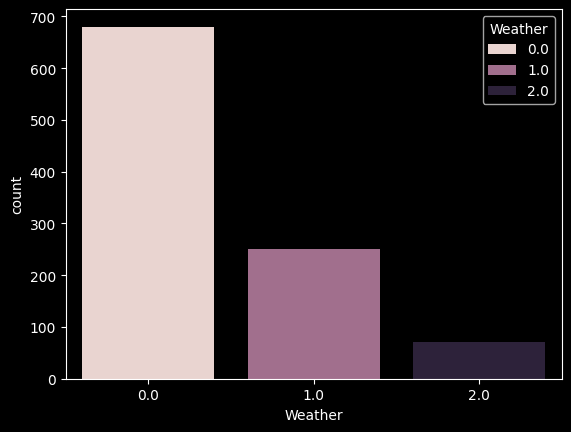

In [22]:
sns.countplot(x= 'Weather',hue='Weather', data=dataFrame,)
plt.show()

In [23]:
dataFrame['Day_of_Week'].value_counts()

Day_of_Week
0.0    680
1.0    320
Name: count, dtype: int64

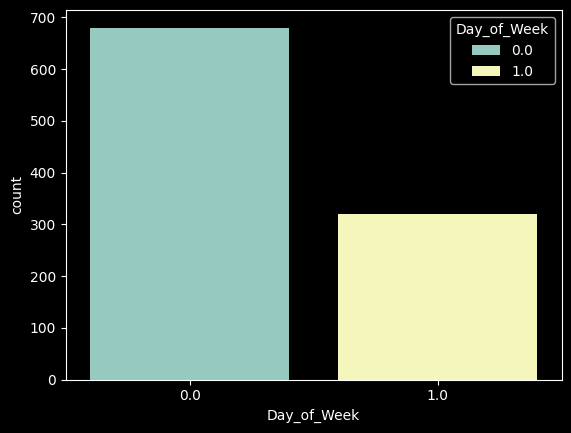

In [24]:
sns.countplot(x= 'Day_of_Week',hue='Day_of_Week', data=dataFrame)
plt.show()

In [25]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       1000 non-null   float64
 1   Time_of_Day            1000 non-null   float64
 2   Day_of_Week            1000 non-null   float64
 3   Passenger_Count        1000 non-null   float64
 4   Traffic_Conditions     1000 non-null   float64
 5   Weather                1000 non-null   float64
 6   Trip_Duration_Minutes  1000 non-null   float64
 7   Trip_Price             1000 non-null   float64
dtypes: float64(8)
memory usage: 62.6 KB


**Choosing the Features and The Target Value**

In [26]:
features = dataFrame.iloc[:,:-1]
dependentVariable = dataFrame.iloc[:,-1]

**Scaling the Data**

In [27]:
standardScalar = StandardScaler()
features = standardScalar.fit_transform(features)

In [28]:
featuresTrain, featuresTest, dependentVariableTrain, dependentVariableTest = train_test_split(features, dependentVariable , test_size=0.2, random_state=200)

In [29]:
featuresTrain

array([[ 7.25563435e-01,  9.11874928e-01,  1.45773797e+00, ...,
         2.91860200e-01,  9.92296339e-01, -4.89664262e-01],
       [ 5.13004537e+00, -1.35053807e-01,  1.45773797e+00, ...,
        -1.04083478e+00, -6.34418971e-01, -1.04770747e+00],
       [ 1.10511954e+00, -1.18198254e+00, -6.85994341e-01, ...,
        -1.04083478e+00, -6.34418971e-01,  2.26838413e-16],
       ...,
       [-8.85487221e-01, -1.35053807e-01,  1.45773797e+00, ...,
         2.91860200e-01, -6.34418971e-01,  1.28375107e+00],
       [-6.44654745e-01, -1.35053807e-01, -6.85994341e-01, ...,
         2.91860200e-01, -6.34418971e-01,  1.79646125e+00],
       [-1.29856391e+00, -1.18198254e+00, -6.85994341e-01, ...,
        -1.04083478e+00, -6.34418971e-01,  1.65950442e+00]])

In [30]:
featuresTest

array([[-0.30738614,  0.91187493,  1.45773797, ...,  1.62455518,
        -0.63441897, -0.81784985],
       [-0.10007424, -1.18198254,  1.45773797, ...,  0.2918602 ,
         0.99229634, -0.15605148],
       [-0.39196114,  0.91187493, -0.68599434, ..., -1.04083478,
        -0.63441897,  0.70974553],
       ...,
       [-0.26045733, -1.18198254, -0.68599434, ...,  1.62455518,
        -0.63441897,  0.30079053],
       [ 0.27896617,  0.91187493, -0.68599434, ..., -1.04083478,
        -0.63441897, -1.36695415],
       [-0.47086343, -1.18198254, -0.68599434, ...,  1.62455518,
        -0.63441897,  0.75444007]])

In [31]:
dependentVariableTrain

989     82.442000
835    224.914663
678     50.731200
177     56.874773
410    206.508652
          ...    
810    109.430400
836     65.947900
784     45.431200
617     37.390000
794     52.779600
Name: Trip_Price, Length: 800, dtype: float64

In [32]:
dependentVariableTest

674    30.401500
233    53.279200
739    40.566500
865    59.742100
523    84.155800
         ...    
931    63.777700
871    56.874773
397    56.874773
355    41.656200
593    58.086100
Name: Trip_Price, Length: 200, dtype: float64

**Alogrithm Used :**

In [33]:
model = LinearRegression()
model.fit(featuresTrain, dependentVariableTrain)
predections = model.predict(featuresTest)

**The Accuracy**

In [34]:
rSquaredScore = r2_score(dependentVariableTest, predections)
print("The accuracy is {}%".format(round(rSquaredScore, 2) * 100))



The accuracy is 79.0%


**Results**

In [35]:
results = pd.DataFrame({
    "Actual": dependentVariableTest,
    "Predicted": predections
})
print(results.head(20))

         Actual   Predicted
674   30.401500   39.690204
233   53.279200   53.460984
739   40.566500   50.785471
865   59.742100   61.354130
523   84.155800   74.458490
726   28.723500   22.251905
473   61.094000   72.202931
501   47.996000   57.767367
570   61.228700   67.471826
346   86.897700   79.886324
221   63.953400   66.682536
207   56.874773   68.328911
256   92.683200   80.098385
588  247.598318  202.494894
74    36.438800   83.523938
404   26.117600   59.773535
632   56.874773   54.417319
294   33.749100   21.894367
659   65.195000   56.066105
136   75.220400   65.136098


**Ploting Actul vs Predections Data**

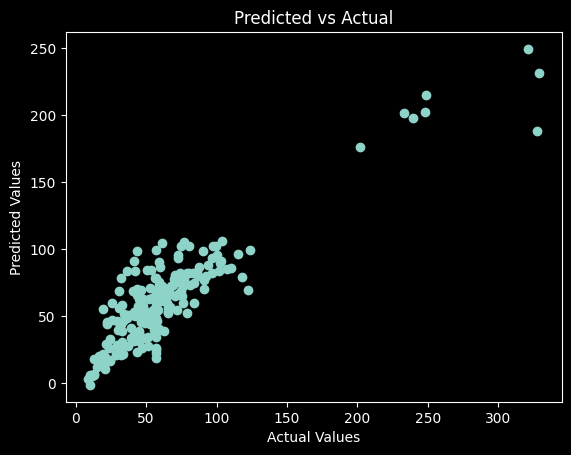

In [36]:
import matplotlib.pyplot as plt

plt.scatter(dependentVariableTest, predections, alpha=1)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.show()

**A User Input Code**

In [38]:
trip_distance = float(input("Enter the Trip Distance (in km): "))
time = input("Enter the Time of Day ([M]orning , [A]fternoon , [E]vening , [N]ight): ").lower()

global time_of_day
match time:
    case "m":
        time_of_day = 0
    case "a":
        time_of_day = 1
    case "e":
        time_of_day = 2
    case "n":
        time_of_day = 3

day = input("Enter the Day of Week (Week[d]ay , Week[e]nd): ").lower()

global day_of_week
match day:
    case "d":
        day_of_week = 0
    case "e":
        day_of_week = 1

passenger_count = int(input("Enter the Passenger Count (1-4): ")) - 1
traffic = input("Enter the Traffic Conditions ([L]ow , [M]edium , [H]igh): ").lower()

global traffic_conditions
match traffic:
    case "l":
        traffic_conditions = 0
    case "m":
        traffic_conditions = 1
    case "h":
        traffic_conditions = 2

weather_condition = input("Enter the Weather condition ([C]lear , [R]ain , [S]now): ").lower()

global weather
match weather_condition:
    case "c":
        weather = 0
    case "r":
        weather = 1
    case "s":
        weather = 2


trip_duration = float(input("Enter the Trip Duration could be flout : "))
user_input = [[trip_distance, time_of_day, day_of_week, passenger_count, traffic_conditions, weather, trip_duration]]
user_input_scaled = standardScalar.transform(user_input)
prediction = model.predict(user_input_scaled)
print(f"The predicted Trip Price is: {prediction[0]}")




The predicted Trip Price is: 97.49816330762044


C:\Users\mahdi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
